# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [3]:
import pandas as pd
import numpy as np

dat = pd.read_csv("Fishing.csv", encoding = "UTF-8")
print(dat.shape)
dat.head(8)

(1182, 14)


,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [4]:
dat['log_income'] = dat['income'].apply(np.log)
dat.head(1)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.93,0.5391,157.93,157.93,157.93,182.93,0.0678,0.0503,0.2601,0.5391,7083.3317,8.8655


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [23]:
f = lambda x: abs(x)
dat['pdiff'] = (dat['price'] - dat['pbeach']).apply(f)
dat.head(2)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.00
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.42


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [21]:
dat.groupby('mode')['price'].agg('mean')

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [30]:
l = lambda x: x.median() - x.mean()
dat.groupby('mode')['price'].agg(l)

mode
beach     -16.391493
boat      -17.004813
charter   -18.226942
pier      -13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [92]:
item = dat.groupby("mode")

for i in range(0,len(list(item))):         #в цикле количества получившихся групп
    df = pd.DataFrame(list(item)[i][1])    #достаем датафрейм из списка
    df.to_csv(f"{list(item)[i][0]}.csv")   #и записываем его в файл с названием первого элемента списка


### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [101]:
dat.sort_values(['income'], inplace = True, ascending = False)
dat.head(3)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1118,1118,1119,boat,15.790,0.7369,180.006,180.006,15.790,40.790,0.2537,0.1498,0.7369,2.3101,12499.998,9.433484,164.216
1085,1085,1086,boat,37.896,0.7369,227.376,227.376,37.896,62.896,0.2537,0.1498,0.7369,2.3101,12499.998,9.433484,189.480
668,668,669,boat,47.370,0.0102,252.640,252.640,47.370,82.370,0.0678,0.0789,0.0102,0.0209,12499.998,9.433484,205.270


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [103]:
dat.sort_values(['price','income'],inplace = True)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
336,336,337,beach,2.290,0.0678,2.290,2.290,2.290,27.290,0.0678,0.0503,0.0276,0.0029,1249.99980,7.130899,0.000
323,323,324,pier,2.290,0.0503,2.290,2.290,2.290,27.290,0.0678,0.0503,0.2601,0.5391,1249.99980,7.130899,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.00130,8.740337,223.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.00100,9.076809,242.734
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.66630,8.976725,271.960


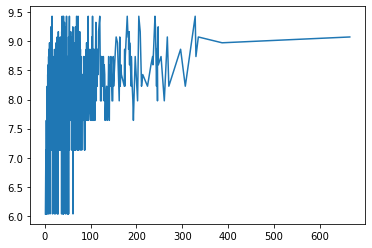

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(dat['price'], dat['log_income'])
 
# согласно графику видно что люди с маленьким доходом выбирают только дешевую рыбалку, 
# а люди с большим доходом выбирают разные типы рыбалок  

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [117]:
dat.isnull().sum()
#пропущеенных значений нет 

Unnamed: 0      0
Unnamed: 0.1    0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
log_income      0
pdiff           0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [135]:
data = pd.read_csv("wgi_fh.csv", encoding = "UTF-8", sep = ";", decimal = ",")
print(data)


              country cnt_code  year    va    ps    ge    rq    rl    cc   fh
0               Aruba      ABW  2016  1.27  1.28  0.90  1.35  1.29  1.29  NaN
1             Andorra      ADO  2016  1.20  1.40  1.86  0.87  1.56  1.23  1.0
2         Afghanistan      AFG  2016 -1.09 -2.75 -1.22 -1.33 -1.62 -1.56  6.0
3              Angola      AGO  2016 -1.17 -0.39 -1.04 -1.00 -1.08 -1.41  6.0
4            Anguilla      AIA  2016   NaN  1.31  1.33  0.87 -0.09  1.23  NaN
..                ...      ...   ...   ...   ...   ...   ...   ...   ...  ...
209            Serbia      SRB  2016  0.21  0.05  0.09  0.06 -0.12 -0.31  2.0
210      South Africa      ZAF  2016  0.64 -0.13  0.27  0.21  0.07  0.05  2.0
211  Congo, Dem. Rep.      ZAR  2016 -1.39 -2.20 -1.51 -1.32 -1.61 -1.33  6.0
212            Zambia      ZMB  2016 -0.30  0.18 -0.66 -0.48 -0.30 -0.40  3.5
213          Zimbabwe      ZWE  2016 -1.11 -0.61 -1.16 -1.72 -1.32 -1.28  5.0

[214 rows x 10 columns]


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [136]:
print(f'in dataframe "data" {data.shape[0]} rows and {data.shape[1]} columns \n')
print(data.info())
data.isnull().sum()

#пропущенные значения есть 

in dataframe "data" 214 rows and 10 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
country     214 non-null object
cnt_code    214 non-null object
year        214 non-null int64
va          204 non-null float64
ps          211 non-null float64
ge          209 non-null float64
rq          209 non-null float64
rl          209 non-null float64
cc          209 non-null float64
fh          197 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB
None


country      0
cnt_code     0
year         0
va          10
ps           3
ge           5
rq           5
rl           5
cc           5
fh          17
dtype: int64

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [140]:
data = data.dropna()
print(data.isnull().sum())
data.head(1)
# пропущенные значения удалены

country     0
cnt_code    0
year        0
va          0
ps          0
ge          0
rq          0
rl          0
cc          0
fh          0
dtype: int64


,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.2,1.4,1.86,0.87,1.56,1.23,1.0


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [141]:
data.set_index(['cnt_code'], inplace = True)
data.head(1)

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.2,1.4,1.86,0.87,1.56,1.23,1.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [144]:
data.sort_values(['cc','va'], inplace=True)
data

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [148]:
f = lambda x: round(x, 1)
data['cc_round'] = data['cc'].apply(f)
data.head(2)

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/report/freedom-world-2016/methodology) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [ ]:
### YOUR CODE HERE ###

### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [ ]:
### YOUR CODE HERE ###

### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [ ]:
### YOUR CODE HERE ###

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [ ]:
### YOUR CODE HERE ###